## Project Description

MLB Advanced Media, as stated in a job description for which I was intrigued by, was looking to develop insights into predictability of a hit based on data acquired through their Statcast tool. Statcast is a high-speed, high-accuracy device that tracks ball and player movements. 

The findings of this task would be for use by analysts and commentators during game broadcasts. The problem statement for the specfic prediction I undertook is:

Based on the ballistics of the pitch and the ball hit into play, what is the likelihood it results in a hit.

## Notebook Description

4\. Calculate a **benchmark metric** to understand accuracy by guessing same target for every row


- A guess of no hit for every ball in play results in 67.4% accuracy and an F1 score of .805

_______

### Initialize packages and read in pickled data

In [4]:
cd ipynb/

/home/jovyan/ipynb


In [1]:
% run __init__.py

In [2]:
cd ..

/home/jovyan


In [3]:
df_in_play = pd.read_pickle('data/in_play.p')

In [4]:
df_in_play.shape

(127052, 18)

### For reference, the counts of each class (hit / no hit)

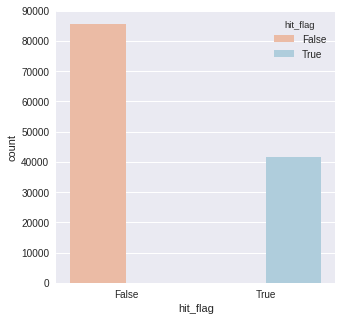

In [7]:
fig = plt.figure(figsize=(5,5))
sns.countplot('hit_flag', hue='hit_flag', data=df_in_play, palette='RdBu')

In [10]:
print("no_hit count: ", df_in_play[df_in_play.hit_flag == False].shape[0])
print("hit count: ", df_in_play[df_in_play.hit_flag == True].shape[0])

no_hit count:  85593
hit count:  41459


In [11]:
no_hit = df_in_play[df_in_play.hit_flag == False].shape[0]
hit = df_in_play[df_in_play.hit_flag == True].shape[0]
class_tuple = (no_hit, hit)

([<matplotlib.patches.Wedge at 0x7fdb25e26278>,
  <matplotlib.text.Text at 0x7fdb25e32eb8>])

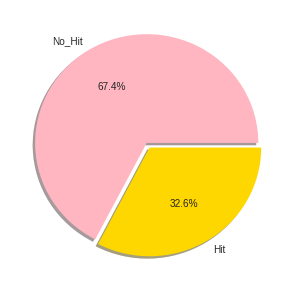

In [28]:
fig = plt.figure(figsize=(5,5))
plt.pie(class_tuple, labels=['No_Hit', 'Hit'], colors=['lightpink', 'gold'], 
        shadow=True, explode=[0,.05], autopct='%1.1f%%')

In [11]:
guess_no_hit_for_all = pd.Series(df_in_play['pitch_result'].astype('bool'))

In [12]:
guess_no_hit_for_all.sum()

127052

In [13]:
actual_values = (df_in_play['hit_flag'] == False)

In [14]:
actual_values.sum()

85593

### Fundamental Question: Which pitches and balls in play are hits?

In [15]:
accuracy_score(actual_values, guess_no_hit_for_all)

0.6736847904794887

In [16]:
fbeta_score(actual_values, guess_no_hit_for_all, beta=1)

0.80503186061275833

In [17]:
f1_score(actual_values, guess_no_hit_for_all)

0.80503186061275833